<h2><font color="#004D7F" size=5>Módulo 1 - 2 - 3</font></h2>



<h1><font color="#004D7F" size=6>Proyecto Capstone</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>.</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático y Minería de Datos</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Ingeniería</font>



<div style="text-align: left">
<font color="#004D7F" size=5>Alumno: SUÁREZ SUNCIÓN, JUAN MARTÍN </font><br>

</div>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Conjunto de datos inicial](#section2)
* [3. Tratamiento de datos con Pandas](#section3)
    * [3.1. Formato Tidy Data de nuestros datos](#section31)
    * [3.2. Limpieza de datos](#section32)
    * [3.3. Extracción de conocimiento con estadísticas primarias](#section33)
* [4. Análisis de datos](#section4)
    * [4.1. Análisis numérico](#section41)
    * [4.2. Representación gráfica](#section42)
    * [4.3. Correlación entre variables](#section43)
* [5. Contraste de hipótesis](#section5)
    * [5.1. Teorema del límite central](#section51)
    * [5.2. Test de normalidad](#section52)
    * [5.3. Test de significacia paramétrico](#section53)
    * [5.4. Test de significacia no paramétrico](#section54)
* [6. Análisis exploratorio de los datos](#section6)
* [7. Conclusiones](#section7)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
# display(HTML("<style>.container{ width:100% }</style>"))

---
<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

El siguiente Jupyter tiene el objetivo de guiar al alumno a realizar su proyecto Capstone para la evaluación del examen parcial. Este proyecto Capstone se deberá realizar suguiendo los conocimiento adquiridos en los módulos 1, 2 y 3 que se han visto en el curso de Aprendizaje Automático y Minería de Datos (AAyMD) de la Maestría de Ciencia de la Computación de la Facultad de Ciencias en la Univerdad Nacional de Ingeniería.

## Instrucciones

* Fecha de entrega será antes del martes 5 de Noviembre a las 23:59.
* El formato de entrega será este mismo Jupyter Notebook pero con el código resuelto y correctamente comentada la salida.
* Se deberá establecer un hilo argumental en todo el Jupyter de manera que la ejecución de un código anterior nos permita realizar un nivel de síntesis posterior a lo largo del todo el cuaderno teniendo unas conclusiones finales sobre nuestro conjunto de datos
* El laboratorio tendrá una puntuación sobre 20.
* En el solucionario se deberá tener los enunciados ya sean originales o nuevos establecidos por estudiante respecto al hilo argumental. 
* La primera hoja será para la portada que se especificará, el número de laboratorio, nombre y apellidos de los integrantes, nombre de la asignatura y el escudo de la UNI.
* Se deberá establecer el índice correctamente según las diferentes subsecciones agregadas a cada módulo.
* Las citas y extracciones realizadas de Internet se deberán especificar. No se corregirá el laboratorio en caso de copiar y pegar fragmentos sin especificar.
* Utilizar una redacción clara y nítida sobre el contenido que se quiera discutir, insisto, establecer un hilo argumental técnico y profesional.
* Recordar de poner todo paso a paso, es decir, si por ejemplo vamos a hacer tratamiento a valores NaN, primeramente deberemos justificar el procedimiento a utilizar viendo cuántos son, dónde se encuentran, son críticos...

## Objetivos

* Escoger un conjunto de datos de cosea propia o extraido de internet que tenga diferentes partes y poder tratarlo con Pandas.
* Optimizar un tratamiento de datos con Pandas, para ello deberemos analizar si nuestro conjunto de datos se encuentra como Tidy Data.
* Sintetizar el conjunto de datos de manera que los datos finales antes de proceder al análisis exploratorio sean robustos.
* Comprender un Análisis una Exploración de los datos para ver su distribución, analizando la distribución numérica de variables, la correlación entre ellas y su representación gráfica adecuada.
* Analizar un contraste de hipótesis en las variables de nuestro conjunto de datos, es decir, verificar el teorema del límite central, un test de normalidad la significación (ya sea paramétrica o nó paramétrica).
* Tomar decisiones sobre nuestros datos realizando un Análisis exploratorio de los mismos con Seaborn.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>


---
<a id="section2"></a>
# <font color="#004D7F"> 2. Conjunto de datos inicial</font>


## Dependencias

Antes de comenzar cargaremos las dependencias necesarias:

In [2]:
# Importar las librerías que se utilizarán en vuestro proyecto Capstone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import json
import math
import pylab as pl
from ast import literal_eval#Para pasara de string a list. Eleimnar los "".
import scipy as scp #Para el test de Shapiro Wilks
import random #Para obtener unos elementos al azar de una lista
import statistics #Para la media de una lista
warnings.filterwarnings('ignore')

## Conjuntos de datos

Se indicará los conjuntos de datos utilizados en el proyecto con una pequeña definición formal de los mismos. Para este trabajo se deberán escoger un mínimo de **dos conjuntos de datos relacionados** para así poder hacer análisis relacionados con ellos. Será decisión vuestra ver si unís directamente en un dataframe para el análisis como se hizo en la práctica de Pandas o dejarlos como independientes y obtener decisiones conjuntas de ambos como se hizo en la práctica de Seaborn. 

## INFORMACIÓN DE LOS DATA SET UTILIZADOS
Han sido obtenio de la página de kaggle. Es un una colección de datos de películas. Son más de 45 mi películas. 


> * <i class="fa fa-book" style="color:#113D68"></i> [Link Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset#links_small.csv)
> * <i class="fa fa-book" style="color:#113D68"></i> [Link Google-Resuvido](https://drive.google.com/drive/folders/1BYnsbcod_Zdy7mdUI7qCb_y28r6aeXeX?usp=sharing)

**movies_metadata.csv**: Contienen la infomarmación básica para 45 mil películas. Entre las columnas se tienen: 'adult' (Si es agulta o no), 'belongs_to_collection' (si es que la película pertenerce a una colección), 'budget' (presupuesto), 'genres' (géneros), 'homepage' (pág. web), 'imdb_id' (código de IMDB), 'original_language' (leguaje original en el que fue realizado), 'original_title' (título original), 'overview' (de qué trata la película), 'popularity' (pupularidad), 'poster_path' (link para el poster), 'production_companies' (compañía la cual realizó la película), 'production_countries' (país en el cual fue realizado), 'release_date' (fecha de lanzamiento), 'revenue' (ingresos), 'runtime' (duración en minutos), 'spoken_languages' (lenguas habladas en la película), 'status' (en qué fase está la película), 'tagline' (lema), 'title' (título), 'video','vote_average', 'vote_count'.

**keywords.csv**: Palabras claves.

**credits.csv**: Contienen información de los personajes de las películas y nombre de quién lo interpreta en la vida real.

**links.csv**: En este trabajo se id's (claves): 1. Clave de la película por defecto, 2. Clave dada por IMDB, 3. Clave dada por TheMovieDB

**links_small.csv**: Contienen lo mismo que links.csm  solo que para 9 mil películas. 

**df_ratings**: La votación para distintas películas. Más de 25 millones de votaciones.

**ratings_small.csv**: Una partición de df_ratings. Solo contienen 0.1 millones de votaciones.

In [3]:
#Se demora un poco ya que son en total 900MB de datos
df_movies_metadata=pd.read_csv("movies_metadata.csv")
df_links=pd.read_csv("links.csv")
df_credits=pd.read_csv("credits.csv")
df_keywords=pd.read_csv("keywords.csv")
df_links_small=pd.read_csv("links_small.csv")
df_ratings=pd.read_csv("ratings.csv")
df_ratings_small=pd.read_csv("ratings_small.csv")

In [4]:
display("df_movies_metadata",df_movies_metadata.head(3))
display("df_links",df_links.head(3))
display("df_credits",df_credits.head(3))
display("df_keywords",df_keywords.head(3))
display("df_links_small",df_links_small.head(3))
display("df_ratings",df_ratings.head(3))
display("df_ratings_small",df_ratings_small.head(3))

'df_movies_metadata'

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


'df_links'

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


'df_credits'

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


'df_keywords'

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


'df_links_small'

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


'df_ratings'

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


'df_ratings_small'

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


La primera bservación a groso modo es que el data frame que más se va a trabajar es la de **df_movies_metadata**. En esta mucho de sus datos están enpaquetados en una lista de diccionarios tales como **genres**, entre otras. Tambien decir que este df no está en fomar Tidy Data por este motivo. Lo coreccto sería tener una nueva columna con los géneros (después se verá esto ya que cada película tienen varios géneros principales).

Otra punto a resaltar es que estos DataFrame se unen mediante las claves movieId, imdbId o tmdbId. Y todas ellas llevan una conexión por ende sí se podrán unir. 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Tratamiento de datos con Pandas</font>

Este ejercicio tendrá dos partes principales a trabajar: 

* La primera, y muy importante, tener nuestros datos con formato Tidy Data por lo que tenemos que utilizar lo trabajado en el módulo 2.7.
* Una vez obtenidos los datos como Tidy Data deberemos realizar una limpieza de datos (Jupyer de referencia: Limpieza de datos), esto es:
    * Ver si tenemos outliers y, una vez identificados deberemos tratarlos adecuadamente. Recordar que las técnicas son principalmente: (i) eliminar las observaciones; (ii) estimar su valor a través de la media o mediana o interpolación... y; (iii) para los más atrevidos, utilizar un modelo de predicción para estimar su valor
    * Ver valores perdidos como NaN u otros, los cuales trataremos bajo el mismo esquema que el punto anterior.
* Extracción de conocimiento, estadísticas primarias y tratamiento de datos con Pandas (Jupyer de referencia: Ejercicios con Pandas (I y II)).

Hay que tener en cuenta en especificar de manera justificada diferentes puntos en esta sección, por ejemplo:
* Justificar que los tipos de datos sean correctos: categóricos, numéricos...
* Identificar y señalar valores perdidos o NaN.
* Justificar la técnica de reemplazo de valores perdidos
* Verificar y justificar si todas las variables me van a servir para mi análisis exploratorio o tengo que eliminar algunas.
* Transformar los datos correctamente, por ejemplo, si es sueldo que la variable sea numérico y no contenga caracteres (por ejemplo _$_ o _€_).
* Recordar que el formato en el que tienen que estar los datos es Tidy. Por lo que, no solamente los atributos independientes deben estar bien establecidos, sino ordenados, codificados...
* En el Jupyter de "Ejercicios con Pandas (I y II)" se obtuvieron algunas estadísticas y decisiones primarias. Este tipo de técnicas son muy importantes y se requiere explorar numéricamente el dataset por lo que es importante extraer este conocimiento de estos conjuntos de datos antes del análisis exploratorio.


<a id="section31"></a>
# <font color="#004D7F"> 3.1. Formato Tidy Data de nuestros datos</font>

In [5]:
df_movies_metadata.head(3).T#Es para la transpuesta. Para tener así una mejor vista de los atributos

,0,1,2
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


## info

In [6]:
#Se trabajaraá principalmente con el df principal el cual es df_movies_metadata
df_movies_metadata.info() #Tener en cuenta que no se puede tener id repetidos, que es como tener la misma pelicula 2 veces
#adult                    Debe ser boleano *
#belongs_to_collection    Se tienen que desenpaquetar*
#budget                   Debe ser numérico*
#genres                   Se debe desenpaquetar *
#id                       Debe ser numéricos*
#imdb_id                  Debe ser numérico*
#original_language        Debe ser categórico (cualitativa nominal)*
#popularity               Debe ser numérico *   
#production_companies     Se debe de desempaquetar*
#production_countries     Se debe de desempaquetar*
#release_date             Se debe pasara a DateTime*
#spoken_languages         Se debe de desempaquetar*
#status                   Debe ser categórico (cualitativa nominal)*
#video                    Bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [7]:
df_movies_metadata.adult.value_counts()   #Vemos que hay somo 3 valores no son bool. Por ser pocos pasamos a eliminarlos

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [8]:
df_movies_metadata2=df_movies_metadata[df_movies_metadata.adult.isin(["False","True"])]#Solo cogemos los que son False o True en adult
df_movies_metadata2.adult=df_movies_metadata2.adult.astype("bool")#Pasamos a tipo bool
df_movies_metadata2.adult.dtype

dtype('bool')

Para desempaquetar algunas columnas lo que he hecho ha sido crear dos funciones la cuales me dan todos los valores para cada dato trabajado. (Se deben eliminar las " " del inicio y final)
Por ejemplo: si se trabaja con la columna belongs_to_collection, el 1er dato es: 

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}" 

Solo me importa el name: 'Toy Story Collection'. Todo lo demás no es información necesaria.

In [9]:
#Solo es para production_companies, genres, production_countries, spoken_languages
#column es una columna de df_movies_metadata
#Ejemplo "[{nombre:"Martin",edad:25}]"
def desenpaquetar(column):   #De acá solo saca listColumns y listColumns2 y conjuntosPorCadaFila. Se le asigna a otra variable
    global listColumns #Contendrá la dista de diccionarios. Tener en cuenta que antes se tienen que pasar de string a objetos (eliminar las dobles comillas)
    listColumns=[None]*len(df_movies_metadata)#Si lo hago con el appedn el nan me produce problemas
    for i in range(len(df_movies_metadata)):
        try:#Uso try y except ya que cuando el se tenen un dato nan se produce un error
            listColumns[i]=(literal_eval(df_movies_metadata[column][i]))#literal_eval Es para eiminar las comillas
        except:
            pass
    global listColumns2#Va a contenertodo los valores que nos importa para c/ dato. Por ejemplo se tendria "Martin" y 25
    listColumns2=[None]*len(df_movies_metadata)
    global conjuntosPorCadaFila
    conjuntosPorCadaFila=set()#Va a contener todos los valores sin repetir, p.e.: tendría todos los nombres sin repetir.
    for i in range(len(df_movies_metadata)):
        try:
            l=[]
            for j in range(len(listColumns[i])):
                try:
                    l.append(listColumns[i][j]["name"])
                    conjuntosPorCadaFila.add(listColumns[i][j]["name"])
                except:
                    pass
            listColumns2[i]=l
        except:
            pass 

In [10]:
#Pasando budget a NUMERICO
df_movies_metadata.budget.sort_values()[:4]#ME doy cuenta que hay 3 elenetos los cuales en vez de ser numericos tienen un texto. Como solo son 3 datos
#paso a eliminarlos

19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
45465                                   0
Name: budget, dtype: object

In [11]:
idAEliminar=[19730,29503,35587]
df_movies_metadata.drop(idAEliminar,inplace=True)

In [12]:
df_movies_metadata.budget.sort_values()[:4]#ahora ya no salen los texto. Ahora sí se podrá pasar a a Numeérico

45465    0
26992    0
26993    0
26994    0
Name: budget, dtype: object

In [13]:
df_movies_metadata=df_movies_metadata.astype({'budget': 'float',"id":"int"})#El id no tienen valores que causen problemas, por enede se pasa de frente a int
df_movies_metadata.budget.dtype#Ahora ya es flotante

dtype('float64')

In [14]:
df_movies_metadata.imdb_id.sort_values()[:3]#Me doy cuenta que voy a tener que limpiar estos datos ya que contienen un tt al comienzo.
#Elimino esos tt para poner unir con el otro df df_links (contienen los links de la pelicula, de la pelicula en imdb y el id de la pelicula en the moviedb)

43777    tt0000001
32312    tt0000003
19138    tt0000005
Name: imdb_id, dtype: object

In [15]:
patron=re.compile("[\d]+")
patron.findall(df_movies_metadata.iloc[0].imdb_id)[0]#Ejemplo

'0114709'

In [16]:
l1=[None]*len(df_movies_metadata)
patron=re.compile("[\d]+")
for i in range(len(df_movies_metadata)):
    try:#se usa try excep ya que los 0 y los nan me van a producir problemas
        
        #l1[i]=df_movies_metadata.iloc[i].imdb_id[2:]#De tt0000001 Solo voy a eleimnar los 1ros 2 caracteres
        l1[i]=patron.findall(df_movies_metadata.iloc[i].imdb_id)[0]#De tt0000001 Solo voy a eleimnar los 1ros 2 caracteres

    except:
        pass

In [17]:
df_movies_metadata.imdb_id=l1    

In [18]:
df_movies_metadata.imdb_id.sort_values().head()#Notamos que hay valores None los cuales antes de hacer el uso de l1 ya eran None. 

43777    0000001
32312    0000003
19138    0000005
17569    0000008
25900    0000010
Name: imdb_id, dtype: object

In [19]:
df_movies_metadata.imdb_id.value_counts().head()#ME doy cuenta que hay claves imdb_id repetidas. vemos una de ellas

1180333    3
1736049    2
0499537    2
0062229    2
0287635    2
Name: imdb_id, dtype: int64

In [20]:
df_movies_metadata[df_movies_metadata.imdb_id=="1180333"]#Notamos que contienen lo mismo, es por ellos que solo me voy a quedar con las filas
#no repetidas.

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13261,False,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13375,False,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0


In [21]:
df_movies_metadata = df_movies_metadata.drop_duplicates()#Elimino las filas duplicadas

In [22]:
df_movies_metadata.imdb_id.value_counts().head()#Me doy cuenta que aun siguen habiend duplicados para la calve imdb

0270288    2
0100361    2
0499537    2
2121382    2
0022879    2
Name: imdb_id, dtype: int64

In [23]:
#Veamos una de ellas
df_movies_metadata[df_movies_metadata.imdb_id=="0499537"]  
#En vote_count tienen valores distintos. Pero esto no lo debería de tomar en cuenta que que es la misma película y solo en vote_count es distinto, por
#ende paso a eliminarlo. O en otras palabras yo quiero que mi imdb_id sea único

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
11342,False,NaN,2500.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",...,2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0
15765,False,NaN,2500.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",...,2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0


In [24]:
df_movies_metadata=df_movies_metadata.astype({'imdb_id': 'float'})

In [25]:
df_movies_metadata=df_movies_metadata.dropna(subset=["imdb_id"])#elimino las filas en las cuales imdb_id sea nan

In [26]:
df_movies_metadata.original_language.sort_values().tail(15)#Me doy cuenta que hay valores nan. 

30631     zh
18385     zh
10366     zh
10697     zu
19574    NaN
21602    NaN
22832    NaN
32141    NaN
37407    NaN
41047    NaN
41872    NaN
44057    NaN
44410    NaN
44576    NaN
44655    NaN
Name: original_language, dtype: object

In [27]:
df_movies_metadata['original_language'] = df_movies_metadata['original_language'].astype('category')#Lo paso a categoría.

In [28]:
df_movies_metadata.popularity=df_movies_metadata.popularity.astype('float')
df_movies_metadata.popularity.sort_values()[-5:]#Notamos que tienen valore NaN. Cojo los ultimos 5 valores
#Como solo son 3 pasamos a eliminarlos. Recordar que el total de filas en 45 mil.

33356    294.337037
30700    547.488298
19729           NaN
29502           NaN
35586           NaN
Name: popularity, dtype: float64

In [29]:
df_movies_metadata=df_movies_metadata.dropna(subset=["popularity"])#Para eliminar final que contenga NaN en la columna popularity

In [30]:
df_movies_metadata["release_date"]=pd.to_datetime(df_movies_metadata["release_date"])#Pasando a datetime
df_movies_metadata['status'] = df_movies_metadata['status'].astype('category')
df_movies_metadata['video'] = df_movies_metadata['video'].astype('bool')

In [31]:
df_movies_metadata['status'].unique()#NaN no lo toma como categoría. Pero entre los valores disdintos aparece NaN.

[Released, NaN, Rumored, Post Production, In Production, Planned, Canceled]
Categories (6, object): [Released, Rumored, Post Production, In Production, Planned, Canceled]

### uniendo con los data frame que se tuvo que sacar sus elementos (desenvolver)

In [32]:
df_movies_metadata2=df_movies_metadata.set_index("id")
df_movies_metadata2.head(1)

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [33]:
#No pueden haber películas que tengan el mismo id, solo pararemos a tenen una de ellas. Ya que esto es información repetida. 
#Recordas que más arriba se vio qué contienen una de llas con el mismo id.
df_movies_metadata2.index.value_counts().sort_values(ascending=False)[:20]

97995     2
14788     2
77221     2
99080     2
84198     2
12600     2
22649     2
15028     2
4912      2
132641    2
69234     2
109962    2
265189    2
110428    2
159849    2
13209     2
10991     2
30735     1
43029     1
38931     1
Name: id, dtype: int64

In [34]:
indices_a_eliminar=(df_movies_metadata2.index.value_counts().sort_values(ascending=False)[:20]==2).index.values
indices_a_eliminar

array([ 97995,  14788,  77221,  99080,  84198,  12600,  22649,  15028,
         4912, 132641,  69234, 109962, 265189, 110428, 159849,  13209,
        10991,  30735,  43029,  38931], dtype=int64)

In [35]:
df_movies_metadata2=df_movies_metadata2.drop(indices_a_eliminar)

In [36]:
df_movies_metadata2.index.value_counts().sort_values(ascending=False)[:5]#Ahora sí ya no se tienen filas con id repetidos.

276895    1
14375     1
18441     1
88075     1
241553    1
Name: id, dtype: int64

In [37]:
desenpaquetar("production_companies")
valores_de_production_companies_por_fila=listColumns2.copy()
valores_sin_repetir_de_production_companies=list(conjuntosPorCadaFila).copy()

#La pregunta que me hago es si agregar estos datos a mi df principal, pero noto que algunos datos tienen mas de un valor en su interior. Por ello solo
#voy a crear un nuevo df que contenga el id_IMDB de la película junto con production_companies.
display("Valores de production_companies para los 5 1ras filas", valores_de_production_companies_por_fila[:5])
display("5 valores de todos las compañías de producción",valores_sin_repetir_de_production_companies[:5])

'Valores de production_companies para los 5 1ras filas'

[['Pixar Animation Studios'],
 ['TriStar Pictures', 'Teitler Film', 'Interscope Communications'],
 ['Warner Bros.', 'Lancaster Gate'],
 ['Twentieth Century Fox Film Corporation'],
 ['Sandollar Productions', 'Touchstone Pictures']]

'5 valores de todos las compañías de producción'

['Zanuck Independent',
 'D.D.L.',
 'Veradia Film',
 'Euro Film',
 'Paradigm Hyde Films']

In [38]:
#Por ello he creado una funcion que pasa los elementos de una lista a df.
def de_lista_a_df(l1,ListaDeNombresDeColumnas,listaIndex):
    x=[None]*len(l1)
    df1=pd.DataFrame(x)
    for i in range(len(df1)):
        df1[0][i]=l1[i]
    df1.columns=ListaDeNombresDeColumnas
    df1.index=listaIndex
    return df1
df_production_companies=de_lista_a_df(valores_de_production_companies_por_fila,["production_companies_abierto"],df_movies_metadata.id.values)

In [39]:
df_production_companies.index.name="movieId"
print("df_production_companies")
df_production_companies.head(3)

df_production_companies


,production_companies_abierto
movieId,
862,[Pixar Animation Studios]
8844,"[TriStar Pictures, Teitler Film, Interscope Co..."
15602,"[Warner Bros., Lancaster Gate]"


In [40]:
df_movies_metadata3=df_movies_metadata2.copy()
df_movies_metadata4=pd.concat([df_movies_metadata3,df_production_companies],axis=1,join="inner")#Inne para que sea solo los indices en comun, axis 1 para que se acople por el costado y
#no debajo
df_movies_metadata4.head(1)#Ahora tienen la columna production_companies_abierto

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_abierto
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,[Pixar Animation Studios]


In [41]:
desenpaquetar("genres")
valores_de_genres_por_fila=listColumns2.copy()
valores_sin_repetir_de_genres=list(conjuntosPorCadaFila).copy()
display("Valores de géneros para las 5 1ras filas", valores_de_genres_por_fila[:5])
display("5 valores de todos los géneros",valores_sin_repetir_de_genres[:5])

df_genres=de_lista_a_df(valores_de_genres_por_fila,["generos_desenvuelto"],df_movies_metadata.id.values)
df_genres.index.name="movieId"
print("df_genres")
df_genres.head(3)

'Valores de géneros para las 5 1ras filas'

[['Animation', 'Comedy', 'Family'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

'5 valores de todos los géneros'

['Thriller', 'Family', 'Animation', 'Adventure', 'Western']

df_genres


,generos_desenvuelto
movieId,
862,"[Animation, Comedy, Family]"
8844,"[Adventure, Fantasy, Family]"
15602,"[Romance, Comedy]"


In [42]:
df_movies_metadata5=pd.concat([df_movies_metadata4,df_genres],axis=1,join="inner")
df_movies_metadata5.head(1)#Contienen la nueva columna generos_desenvuelto

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_abierto,generos_desenvuelto
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,[Pixar Animation Studios],"[Animation, Comedy, Family]"


In [43]:
desenpaquetar("production_countries")
valores_de_production_countries_por_fila=listColumns2.copy()
valores_sin_repetir_de_production_countries=list(conjuntosPorCadaFila).copy()
display("Valores de los países que produjeron la película para las 3 1ras filas", valores_de_production_countries_por_fila[:3])
display("3 valores de todos los países en los cuales se realizó la película",valores_sin_repetir_de_production_countries[:3])

df_production_countries=de_lista_a_df(valores_de_production_countries_por_fila,["paises_de_produccion_desenvuelto"],df_movies_metadata.id.values)
df_production_countries.index.name="movieId"
print("df_production_countries")
df_production_countries.head(3)

'Valores de los países que produjeron la película para las 3 1ras filas'

[['United States of America'],
 ['United States of America'],
 ['United States of America']]

'3 valores de todos los países en los cuales se realizó la película'

['Uganda', 'North Korea', 'Austria']

df_production_countries


,paises_de_produccion_desenvuelto
movieId,
862,[United States of America]
8844,[United States of America]
15602,[United States of America]


In [44]:
df_movies_metadata6=pd.concat([df_movies_metadata5,df_production_countries],axis=1,join="inner")
df_movies_metadata6.head(1)#Contienen la nueva columna paises_de_produccion_desenvuelto

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America]


In [45]:
desenpaquetar("spoken_languages")
valores_de_spoken_languages_por_fila=listColumns2.copy()
valores_sin_repetir_de_spoken_languages=list(conjuntosPorCadaFila).copy()
display("Valores de los lenguajes hablados la película original para las 3 1ras filas", valores_de_spoken_languages_por_fila[:3])
display("3 valores de todas las lenguas habladas en las películas: ",valores_sin_repetir_de_spoken_languages[:3])

df_spoken_languages=de_lista_a_df(valores_de_spoken_languages_por_fila,["lenguas_habladas_desenvuelto"],df_movies_metadata.id.values)
df_spoken_languages.index.name="movieId"
print("df_spoken_languages")
df_spoken_languages.head(3)

'Valores de los lenguajes hablados la película original para las 3 1ras filas'

[['English'], ['English', 'Français'], ['English']]

'3 valores de todas las lenguas habladas en las películas: '

['', 'ქართული', 'қазақ']

df_spoken_languages


,lenguas_habladas_desenvuelto
movieId,
862,[English]
8844,"[English, Français]"
15602,[English]


In [46]:
df_movies_metadata7=pd.concat([df_movies_metadata6,df_spoken_languages],axis=1,join="inner")
df_movies_metadata7.head(1)#Contienen la nueva columna lenguas_habladas_desenvuelto

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,video,vote_average,vote_count,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,Released,NaN,Toy Story,False,7.7,5415.0,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English]


In [47]:
#Solo es para belongs_to_collection 
def desenpaquetar2(column):   #De acá solo saca listColumns y listColumns2 y conjuntosPorCadaFila
    global listColumns
    listColumns=[None]*len(df_movies_metadata)#Si lo hago con el appedn el nan me produce probelmas
    for i in range(len(df_movies_metadata)):
        try:
            listColumns[i]=(literal_eval(df_movies_metadata[column][i]))#literal_eval Es para eiminar las comillas
        except:
            pass
    global listColumns2
    listColumns2=[None]*len(df_movies_metadata)
    global conjuntosPorCadaFila
    conjuntosPorCadaFila=set()
    for i in range(len(df_movies_metadata)):
        try:
            l=[]
            for j in range(len(listColumns[i])):
                try:
                    l.append(listColumns[i]["name"])
                    conjuntosPorCadaFila.add(listColumns[i]["name"])
                except:
                    pass
            l=set(l)
            listColumns2[i]=list(l)[0]
        except:
            pass 

In [48]:
desenpaquetar2("belongs_to_collection")
valores_de_belongs_to_collection_por_fila=listColumns2.copy()
valores_sin_repetir_de_belongs_to_collection=list(conjuntosPorCadaFila).copy()
display("A qué colección pertenece la película (solo 3 filas)", valores_de_belongs_to_collection_por_fila[:3])
display("Todas las colecciones de las películas (solo 3 filas): ",valores_sin_repetir_de_belongs_to_collection[:3])

df_belongs_to_collection=de_lista_a_df(valores_de_belongs_to_collection_por_fila,["coleccion_desenvuelto"],df_movies_metadata.id.values)
df_belongs_to_collection.index.name="movieId"
print("DATA FRAME: df_belongs_to_collection")
df_belongs_to_collection.head(3)

'A qué colección pertenece la película (solo 3 filas)'

['Toy Story Collection', None, 'Grumpy Old Men Collection']

'Todas las colecciones de las películas (solo 3 filas): '

['Zero Woman Collection', 'Epoch Collection', 'Infernal Affairs Collection']

DATA FRAME: df_belongs_to_collection


,coleccion_desenvuelto
movieId,
862,Toy Story Collection
8844,None
15602,Grumpy Old Men Collection


In [49]:
df_movies_metadata8=pd.concat([df_movies_metadata7,df_belongs_to_collection],axis=1,join="inner")
df_movies_metadata8.head(1).T#Contienen la nueva columna coleccion_desenvuelto

,862
adult,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,3e+07
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
imdb_id,114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."
popularity,21.9469


Del `df_movies_metadata8` pasamos a elminar sus columnas que ya se han trabajado (ya se le sacaron los valores que no interesa de su interior).

In [50]:
columnas_a_eliminar=["production_companies","genres","production_countries","spoken_languages","belongs_to_collection"]
df_movies_metadata9=df_movies_metadata8.drop(columnas_a_eliminar,axis=1)
df_movies_metadata9.head(1)#45393  peliculas

,adult,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,tagline,title,video,vote_average,vote_count,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto
862,False,30000000.0,http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,...,NaN,Toy Story,False,7.7,5415.0,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection


<a id="section32"></a>
## <font color="#004D7F"> 3.2. Limpieza de datos</font>

In [51]:
df_movies_metadata9.adult=df_movies_metadata9.adult.astype("bool")        
df_movies_metadata9.info()  #Notamos que ya están en sus tipos correctos. Solo faltaría hace un tratmiento de los datos nan y ceros.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45393 entries, 862 to 461257
Data columns (total 23 columns):
adult                               45393 non-null bool
budget                              45393 non-null float64
homepage                            7769 non-null object
imdb_id                             45393 non-null float64
original_language                   45382 non-null category
original_title                      45393 non-null object
overview                            44441 non-null object
popularity                          45393 non-null float64
poster_path                         45015 non-null object
release_date                        45312 non-null datetime64[ns]
revenue                             45393 non-null float64
runtime                             45138 non-null float64
status                              45312 non-null category
tagline                             20389 non-null object
title                               45393 non-null object
vide

In [52]:
df_movies_metadata9.select_dtypes(include='float').describe()

,budget,imdb_id,popularity,revenue,runtime,vote_average,vote_count
count,4.539300e+04,4.539300e+04,45393.000000,4.539300e+04,45138.000000,45393.000000,45393.000000
mean,4.225394e+06,9.927660e+05,2.921509,1.121816e+07,94.130311,5.619027,109.998810
std,1.743367e+07,1.362087e+06,6.008229,6.437684e+07,38.412801,1.923225,491.658243
min,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,8.297300e+04,0.386129,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,2.832830e+05,1.127513,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,1.536051e+06,3.678189,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,7.158814e+06,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E382D68948>,
      dtype=object)

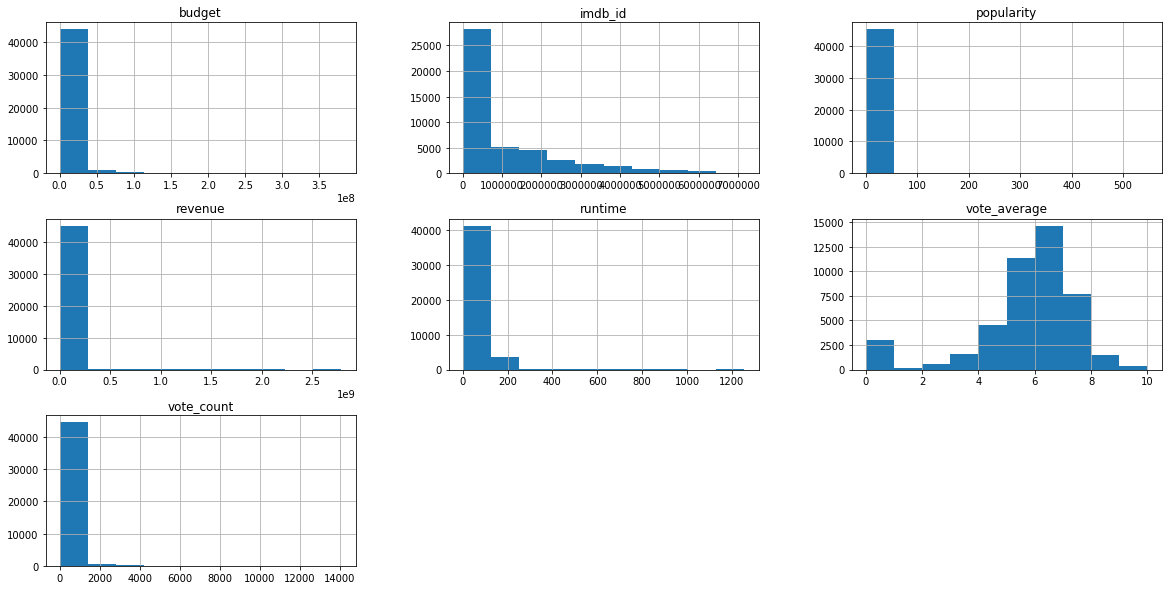

In [53]:
df_movies_metadata9.select_dtypes(include='float').hist(figsize=(20,10))
#Notamos que todos estan muy 

In [54]:
#Notamos que budget min es 0. Pero el presupuesto no puede ser cero. Veamos cuántos son:
df_movies_metadata9.groupby("budget").size()[:3]#Hay 36524 películas que tienen por presupuesto 0. Esto se puede deber a que la escala es
#10^8. Realizemos para el caso en que budget>0:

budget
0.0    36524
1.0       25
2.0       14
3.0        9
dtype: int64

In [55]:
df_dudget_mayor_a_cero=df_movies_metadata9[df_movies_metadata9.budget>0]
df_dudget_mayor_a_cero.shape#8869, 23
#45393 Es la cantidad de peliculas en total. Se están trabajando con 8869/45393=19.5% de películas
#Se modifica otro df, eso se hace para que el original quede intacto.

(8869, 23)

<a id="section33"></a>
## <font color="#004D7F"> 3.3. Extracción de conocimiento con estadísticas primarias</font>

In [56]:
#Veamos ahora cómo están distribuidos el budget:
df_dudget_mayor_a_cero.budget.describe()

count    8.869000e+03
mean     2.162626e+07
std      3.434182e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

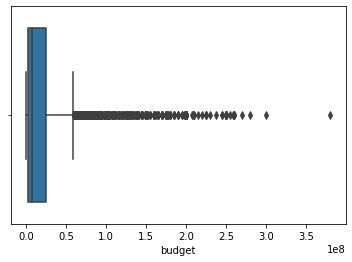

In [57]:
sns.boxplot(df_dudget_mayor_a_cero.budget)#A pesar que se están trabajadon para budget (presupuesto) mayor a cero, se ven outliers y esto
#es debido a que en estos datos estan tanto películas que han sido un hit como películas que fueron un fracazo.

In [58]:
#Algo que sí se podría compara es que de acuerdo a su presupuesto (budget) cuánto ha ganado (reveneu). 
df_dudget_mayor_a_cero.revenue.sort_values()[:3]#Tambien tenenmos películas que tienen por ganancia 0. Realicemos un estudio para el caso
#en que sea mayor que cero este valor. Recordemos que este cero puede ser deido a que está por debajo de la escala de 10^8.

2588      0.0
123964    0.0
117978    0.0
Name: revenue, dtype: float64

8856      1.018619e+06
114903    2.755584e+06
14968     4.197477e+06
3082      8.500000e+06
13703     1.239638e+07
dtype: float64


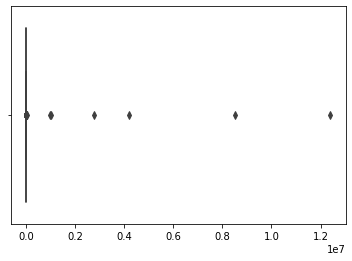

In [59]:
df_dudget_y_revenue_mayor_a_cero=df_dudget_mayor_a_cero[df_dudget_mayor_a_cero.revenue>0]#5369 rows × 23 columns. Es el 11.8% del total
#de las películas 
ganancia_de_acuerdo_al_presupuesto=df_dudget_y_revenue_mayor_a_cero.revenue/df_dudget_y_revenue_mayor_a_cero.budget
print(ganancia_de_acuerdo_al_presupuesto.sort_values()[-5:])
sns.boxplot(ganancia_de_acuerdo_al_presupuesto)#Tambien hay películas las cuales han ganaso mucho en comparación cuando fue su inversión. 
#También hay lo opuesto, las que fracazaron.



In [60]:
#Regresando al df original (el que contienen budget y revenue valores iguales a cero). 
#movieId
df_movies_metadata9.index.name="tmdbId"#Renombrando los indices
df_movies_metadata9.index=df_movies_metadata9.index.values.astype("float")
print(df_movies_metadata9.index.dtype)#ahora su tipo es float
df_movies_metadata9.head(3)
# https://www.themoviedb.org/movie/862-toy-story?language=es-ES  Este es un ejemplo de que la pelicula de Toy Story tienen el id de 862 para
# la página themoviedb.
#Tengo que acoplarlo con el df_links para tener el id de themoviedb

float64


,adult,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,tagline,title,video,vote_average,vote_count,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto
862.0,True,30000000.0,http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,...,NaN,Toy Story,False,7.7,5415.0,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection
8844.0,True,65000000.0,NaN,113497.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",[United States of America],"[English, Français]",None
15602.0,True,0.0,NaN,113228.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]",[United States of America],[English],Grumpy Old Men Collection


In [61]:
df_movies_metadata10=df_movies_metadata9.set_index("imdb_id")
df_movies_metadata10

,adult,budget,homepage,original_language,original_title,overview,popularity,poster_path,release_date,revenue,...,tagline,title,video,vote_average,vote_count,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto
imdb_id,,,,,,,,,,,,,,,,,,,,,
114709.0,True,30000000.0,http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,...,NaN,Toy Story,False,7.7,5415.0,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection
113497.0,True,65000000.0,NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",[United States of America],"[English, Français]",None
113228.0,True,0.0,NaN,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0.0,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]",[United States of America],[English],Grumpy Old Men Collection
114885.0,True,16000000.0,NaN,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,81452156.0,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,[Twentieth Century Fox Film Corporation],"[Comedy, Drama, Romance]",[United States of America],[English],None
113041.0,True,0.0,NaN,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,76578911.0,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[Sandollar Productions, Touchstone Pictures]",[Comedy],[United States of America],[English],Father of the Bride Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209470.0,True,0.0,http://www.imdb.com/title/tt6209470/,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,NaT,0.0,...,Rising and falling between a man and woman,Subdue,False,4.0,1.0,[Mosfilm],"[Fantasy, Comedy, Romance, Drama]",[Russia],[Pусский],None
2028550.0,True,0.0,NaN,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,2011-11-17,0.0,...,NaN,Century of Birthing,False,9.0,3.0,[],"[Comedy, Horror]",[United States of America],[English],None
303758.0,True,0.0,NaN,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,2003-08-01,0.0,...,A deadly game of wits.,Betrayal,False,3.8,6.0,"[Black Fawn Films, Breakthrough Entertainment]","[Mystery, Drama, Thriller, Horror]",[Canada],"[Français, English]",None


In [62]:
df_links2=df_links.set_index("imdbId")
display(df_links.head(3))
#display(df_links.info())
display(df_links2.head(3))
#Para toy story su link en imdb es https://www.imdb.com/title/tt0114709/ Es decir su id_imd es 114709

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


,movieId,tmdbId
imdbId,,
114709,1,862.0
113497,2,8844.0
113228,3,15602.0


In [63]:
df_movies_metadata11=pd.concat([df_movies_metadata10,df_links2],axis=1,join="inner")
df_movies_metadata11.index.name="imdbId"
display(df_movies_metadata11.shape)
display(df_movies_metadata11.head(3))#Contienen los 3 ids:movieId,tmdbId e imdbId

(45330, 24)

,adult,budget,homepage,original_language,original_title,overview,popularity,poster_path,release_date,revenue,...,video,vote_average,vote_count,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto,movieId,tmdbId
imdbId,,,,,,,,,,,,,,,,,,,,,
114709,True,30000000.0,http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,...,False,7.7,5415.0,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection,1,862.0
113497,True,65000000.0,NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,...,False,6.9,2413.0,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",[United States of America],"[English, Français]",None,2,8844.0
113228,True,0.0,NaN,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0.0,...,False,6.5,92.0,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]",[United States of America],[English],Grumpy Old Men Collection,3,15602.0


---

<a id="section4"></a>
# <font color="#004D7F"> 4. Análisis de datos


Una vez tenido nuestros datos correctamente estructurados y los cuales los conocemos ya en profundidad al haber realizado un tratamiento previo, con sus estadísticas primarias, vamos a realizar un análisis profundo de los mismos y conocer más de ellos.

Este apartado es imprescindible, sobre todo, para conocer la relación entre las variables de nuestro conjunto de datos y poder ver de antemano cómo de comportará un algoritmo de Machine Learning en la fase de modelado. Por tanto deberemos explicar de manera técnica y precisa la relación entre variables.

Finalmente, para esta sección se trabajará los pasos vistos en el módulo 3.1. Análisis de datos, los cuales se desarrollará lo siguiente:
* Análsis numérico de nuestros datos. Aunque seguramente se haya realizado en el paso anterior, le damos una vuelta más y, además de verificar, ouliers y perdidos, nos fijamos y explicamos la distribución de ellos, esto es: Media, Mediana, moda, simetrías y asimetrías, distribución, desviación...
* Analizamos mediante una representación gráfica de sus variables. Tenga en cuenta si las variables son de tipo continuo, discreto, categórico...
* Analizamos la correlación entre variables y explicamos la salida que nos dá.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Análisis numérico</font>

In [64]:
#df_ratings Contiene el ratings de las películas que le han dado algugunos usuarios. Este df se une al df principal mediante la clave
#movieId
df_ratings.info()
#Veamos cuanto el el rating promedio que le han dado los usuarios a una película dada. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E39055DAC8>,
      dtype=object)

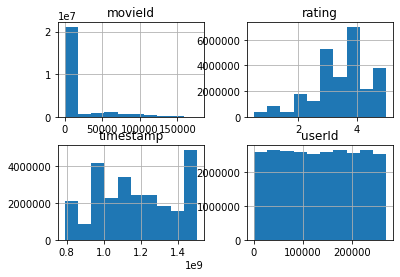

In [65]:
df_ratings.hist()#Para ve como esta distribuido mis datos

In [66]:
#En df_ratings agrupamos por movieId y le sacamos el promedio en rating.
df_mean_en_rating=df_ratings.groupby("movieId").rating.mean()
df_mean_en_rating[:5]#Solo los 5 primeros valores.


movieId
1    3.888157
2    3.236953
3    3.175550
4    2.875713
5    3.079565
Name: rating, dtype: float64

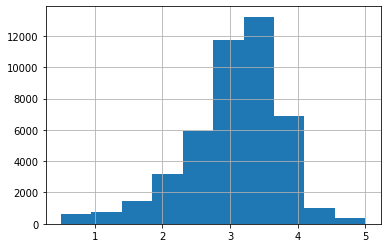

In [67]:
df_mean_en_rating.hist()#Notamos que se "parece" a una gauseana
#Para ver si es una gauseana usaremos un test (Shapiro-Wilk). Tambien se le aplicara el Quantile-Quantile

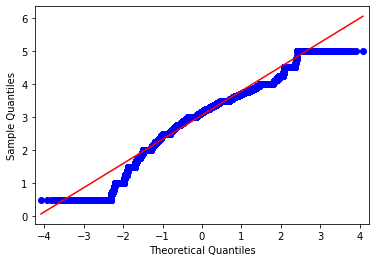

In [68]:
import statsmodels.api as sm
data = df_mean_en_rating.values
sm.qqplot(data,line='s')
plt.show()#Nos damos cuenta que no es una una distribución normal. Para qeu fuere los puntos debebn estar en la línea roja

In [69]:
# # Test de Shapiro-Wilk
import scipy as scp
data = df_mean_en_rating.values
stat, p = scp.stats.shapiro(data)
print('Statistics:%.10f, p=%.10f' % (stat, p))
# Interpretar
alpha = 0.05#Esto puede variar. Eso nos dice hasta que porcentaje de riesgo estamos dispuestos a aceptar
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0). Win H0. Win Gaussian')
else: 
    print('Sample does not look Gaussian (reject H0). Win H1. Win Not Gaussian')
#P es mayor a alfa, no rechazo a hipotesisi nula. Gana H0. Gana 
#Se obtienen que no es una gauseana. Este es un métoma cuantititivo en comparación con QQ ya que en QQ solo vemos la grafica.

Statistics:0.9541486502, p=0.0000000000
Sample does not look Gaussian (reject H0). Win H1. Win Not Gaussian


             rating
count  45115.000000
mean       3.061294
std        0.731186
min        0.500000
25%        2.692308
50%        3.165382
75%        3.500000
max        5.000000


,rating
movieId,
1,3.888157
2,3.236953
3,3.175550


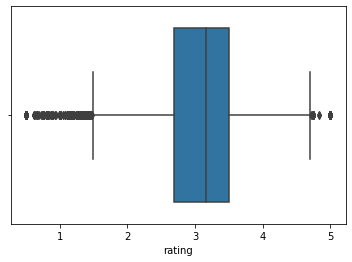

In [70]:
#df_mean_en_rating Pasamos a gregara  nuestro df core
df_movies_metadata11;
df_mean_en_rating2=pd.DataFrame(df_mean_en_rating)
print(df_mean_en_rating2.describe())
display(df_mean_en_rating2.head(3))#45115 filas
sns.boxplot(df_mean_en_rating2.rating)


In [71]:
#Viendo cuantos valores outliers existen
Q3=df_mean_en_rating2.describe().loc["75%"]
Q1=df_mean_en_rating2.describe().loc["25%"]
RIC=(Q3-Q1)[0]#Es [0] es para sacar el valor. Es el Rango intercuartil
limInf=(Q1-1.5*RIC)[0]#1.4807692307692313
limSup=(Q1+1.5*RIC)[0]#3.9038461538461537

In [72]:
print(df_mean_en_rating2[df_mean_en_rating2.rating<limInf].shape)#Entonces tenemos unos 1394 que son unos outliers por debajo de Q1.
#Son 1394/45115=3.089% del total de las observaciones.

print(df_mean_en_rating2[df_mean_en_rating2.rating>limSup].shape)#Entonces tenemos unos 3770 que son unos outliers por encima de Q3.
#Son 3770/45115=8.3564% del total de las observaciones.

(1394, 1)
(3770, 1)


In [73]:
df_links2=df_links.set_index("movieId")
df3=pd.concat([df_mean_en_rating2,df_links2],axis=1,join="inner").set_index("imdbId").drop(["tmdbId"],axis=1)
df_movies_metadata12=pd.concat([df_movies_metadata11,df3],axis=1,join="inner")#Se le agregado rating (lo qeu dijeron unos usuarios respecto a la película
#este valor es distinto al vote_Average que es dado por imdb)
df_movies_metadata12.head(3).T

imdbId,114709,113497,113228
adult,True,True,True
budget,3e+07,6.5e+07,0
homepage,http://toystory.disney.com/toy-story,NaN,NaN
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...
popularity,21.9469,17.0155,11.7129
poster_path,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
release_date,1995-10-30 00:00:00,1995-12-15 00:00:00,1995-12-22 00:00:00
revenue,3.73554e+08,2.62797e+08,0


<a id="section51"></a>
## <font color="#004D7F"> 5.1. Teorema del límite central</font>

Una vez que hemos analizado la distribución de nuestros datos en su conjunto vamos a analizar cada uno de los atributos y entre ellos a través del llamado contraste de hipótesis.

Recordar que en este apartado se trabaja los siguientes conceptos (que se trabajo en el punto 3.2. Contraste de hipótesis):
* Teorema del límite central en el que a medida que aumente el tamaño de las muestras extraídas de la población. Verificarlo si es posible en su conjunto de datos.
* Realizamos un test de normalidad para ver qué atributos tienen una distribución normal y cuáles no. Esto nos permitirá conocér si a los atributos le aplicto un test paramétrico (tiene una distribución gaussiana de la varible) o nó paramétrico (no tiene distribución gausiana la variable). Mostrar los histogramas y las gráficas QQ para cada una.
    * Además aplicamos el test de normalidad con el test de Saphiro-Wilk que nos indica en la salida si nuestra variable tiene una distribución gaussiana (acepta la H0) o no (rechaza H0).
* Una vez visto si nuestras variables tienen una distribución normal aplicamos, según la variable, el test de signivicación paramétrico de t-Student ya sea con la función _ttest_1samp_ o _ttest_ind_. 
* En caso de que no sea normal aplicar el test de significación no paramétrico Wilcoxon.

#### Al realizar estos test hay que discutir adecuadamente la relación que se busca entre dos variables o muestras. 

#### En caso de tener muchas variables escoger las más representativas

In [74]:
# TEOREMA DEL LÍMITE CENTRAL
# Se va a realizar con la columna de budget. A lo que queremos llegar es que al tomar distintas muestras se tendran distintas medias,
# debemos comprombar que esas medias forman una Gausean. Tomaremos 10000 muestras de 1000 valores cada uno.
print("Media de budget: ",df_movies_metadata12.budget.mean())
print("Cantidad de observaciones: ",len(df_movies_metadata12.index))

Media de budget:  4298423.383742826
Cantidad de observaciones:  44608


'Histograma de 10000 muestras de 1000 elementos cada una para Budget: '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3C3E0EF88>]],
      dtype=object)

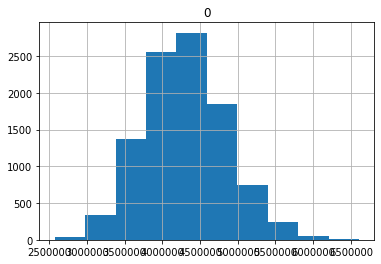

In [75]:
nums_muestra=10000
nums_elems_cad_muest=1000
list_budget=list(df_movies_metadata12.budget.values)#Solo trabajo con budget y lo paso como lista para aplicarle random.sample
#ramdom.sample -> Obtienen elementos al azar de una lista.
means=[statistics.mean(   random.sample(list_budget, nums_elems_cad_muest)   ) for i in range(nums_muestra)]
df_means=pd.DataFrame(means)#Lo paso a df para aplicarle hist()
display("Histograma de 10000 muestras de 1000 elementos cada una para Budget: ",df_means.hist())
#Por el TLC se tienen la la media de este histomama está en 

Gráfica Quantile-Quantile


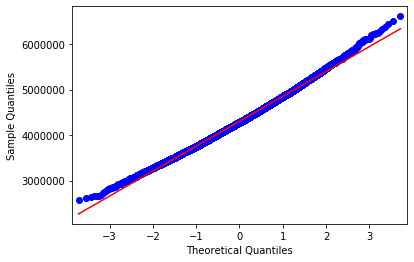

In [76]:
print("Gráfica Quantile-Quantile")
sm.qqplot(df_means[0],line='s')
plt.show()

In [77]:
#Puede que el personaje que interprete también interese para la ganancia neta de la película. O también puede que estén relacionadas
# la variable de revenue (ingresos, cuantitativa) con el personaje principal (categórico) [Test de Wilcoxon]
df_credits.rename(columns={"id":"tmdbId"},inplace=True)
print(df_credits.info())
df_credits.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast      45476 non-null object
crew      45476 non-null object
tmdbId    45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


,cast,crew,tmdbId
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [78]:
df_credits.cast[0]#Chequeando un cast. Me doy cuenta que tengo que extrarer a los personajes más importantes. Estos personajes están 
#después de name, p.e.: Tom Hanks, Tim Allen, etc.

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [79]:
literal_eval(df_credits.cast[0])#Este cero varia hasta len(df_credits)
#len(literal_eval(df_credits.cast[0]))#13
l2=[literal_eval(df_credits.cast[0])[i]["name"] for i in range(len(literal_eval(df_credits.cast[0])))]#len(literal_eval(df_credits.cast[0]))
l2#Así se estrae los personajes para una película (Toy Story). Ahora creeemos una función que me estraiga todos los personajes.
#Me doy cuenta que para extraer a todos los perosnajes toma mucho tiempo porque son 45 mil filas. Es por ello que solo se extraerá a los 
#3 personajes principales (recordar que los personajes por película en este df están ordenados por importancia.)

['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger',
 'Annie Potts',
 'John Morris',
 'Erik von Detten',
 'Laurie Metcalf',
 'R. Lee Ermey',
 'Sarah Freeman',
 'Penn Jillette']

In [80]:
literal_eval(df_credits.cast[137])#Hay filas las cuales me originan problemas porque está vacía. Buscaré a lo más 3 personajes por película

[]

In [81]:
#Esto demora un poquito
lista_personajes=[[literal_eval(df_credits.cast[j])[i]["name"] for i in range(min(3,len(literal_eval(df_credits.cast[j]))))] for j in range(len(df_credits))]
lista_personajes

[['Tom Hanks', 'Tim Allen', 'Don Rickles'],
 ['Robin Williams', 'Jonathan Hyde', 'Kirsten Dunst'],
 ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret'],
 ['Whitney Houston', 'Angela Bassett', 'Loretta Devine'],
 ['Steve Martin', 'Diane Keaton', 'Martin Short'],
 ['Al Pacino', 'Robert De Niro', 'Val Kilmer'],
 ['Harrison Ford', 'Julia Ormond', 'Greg Kinnear'],
 ['Jonathan Taylor Thomas', 'Brad Renfro', 'Rachael Leigh Cook'],
 ['Jean-Claude Van Damme', 'Powers Boothe', 'Dorian Harewood'],
 ['Pierce Brosnan', 'Sean Bean', 'Izabella Scorupco'],
 ['Michael Douglas', 'Annette Bening', 'Michael J. Fox'],
 ['Leslie Nielsen', 'Mel Brooks', 'Amy Yasbeck'],
 ['Kevin Bacon', 'Bob Hoskins', 'Bridget Fonda'],
 ['Anthony Hopkins', 'Joan Allen', 'Powers Boothe'],
 ['Geena Davis', 'Matthew Modine', 'Frank Langella'],
 ['Robert De Niro', 'Sharon Stone', 'Joe Pesci'],
 ['Kate Winslet', 'Emma Thompson', 'Hugh Grant'],
 ['Tim Roth', 'Antonio Banderas', 'Jennifer Beals'],
 ['Jim Carrey', 'Ian McNeice', 'Simon 

In [82]:
df_credits["elenco"]=lista_personajes
df_credits.tail(3)

,cast,crew,tmdbId,elenco
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,"[Erika Eleniak, Adam Baldwin, Julie du Page]"
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa..."
45475,[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",461257,[]


In [83]:
df_credits.crew[0]#Notamos que de todo esto lo que más nos interesa es el Director. Por ello los extraeremos. 

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [84]:
num_filas=len(df_credits.index)#Demora un poquito ya que no extrae de frente el nombre del director por cada fila, sino que primero
#busca que el trabajo sea igual a director y después recién saca el nombre del director
listDirectores=[None]*num_filas#No es recomendable usar el append ya que este me salta los valores vacío. 
for j in range(num_filas):
    for i in range(len(literal_eval(df_credits.crew[j]))):
        if literal_eval(df_credits.crew[j])[i]["job"]=="Director":
            listDirectores[j]=literal_eval(df_credits.crew[j])[i]["name"]
            break#COmo solo me interesa el name del director, no quiero seguir corriendo en las demás características del

In [85]:
listDirectores[:5]#Lista de directores. 5 1ros

['John Lasseter',
 'Joe Johnston',
 'Howard Deutch',
 'Forest Whitaker',
 'Charles Shyer']

In [86]:
df_credits["director"]=listDirectores#pamos a eliminar cast, crew ya se extrajo lo que nos interesa.
df_credits2=df_credits.drop(["cast","crew"],axis=1)
#pd.concat([df_movies_metadata11,df3],axis=1,join="inner")
df_credits2.head()#Este df tenemos que acoplarlo al df core.

,tmdbId,elenco,director
0,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker
4,11862,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer


In [87]:
print(len(df_credits2),len(df_links))
df_elen_dir=pd.merge(df_links,df_credits2, left_on="tmdbId", right_on="tmdbId")#45538 ,45538 
df_elen_dir2=df_elen_dir.set_index("imdbId")
df_elen_dir3=df_elen_dir2.drop(["movieId","tmdbId"],axis=1)#De aca eliminamos movieId y tmdbId que ya están en mi df core. 
#Despues lo acoplamos al df core.
df_elen_dir3.head()

45476 45843


,elenco,director
imdbId,,
114709,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
113497,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
113228,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch
114885,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker
113041,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer


<a id="section42"></a>
## <font color="#004D7F"> 4.2. Representación gráfica</font>

In [88]:
#pd.concat([df_movies_metadata12,df_elen_dir3],axis=1,join="inner")
df_movies_metadata13=pd.merge(df_movies_metadata12,df_elen_dir3, left_on=df_movies_metadata12.index.name, right_on=df_elen_dir3.index.name)
df_movies_metadata13.head(3)#Este df ya contiene al director y a 3 personajes principales.

,adult,budget,homepage,original_language,original_title,overview,popularity,poster_path,release_date,revenue,...,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto,movieId,tmdbId,rating,elenco,director
imdbId,,,,,,,,,,,,,,,,,,,,,
114709,True,30000000.0,http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,...,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection,1,862.0,3.888157,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
113497,True,65000000.0,NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,...,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",[United States of America],"[English, Français]",None,2,8844.0,3.236953,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
113228,True,0.0,NaN,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0.0,...,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]",[United States of America],[English],Grumpy Old Men Collection,3,15602.0,3.175550,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch


In [89]:
len(df_movies_metadata13.director.unique())#17396 directores únicos para las 44 mil películas. Es decir hay directores que han
# hecho más d euna película
df_movies_metadata13[df_movies_metadata13.director==None]#df vacío, lo cual indica que todas la películas ha tiendio director
distribucion_directores=df_movies_metadata13.groupby("director").size().sort_values(ascending=False)
distribucion_directores[:10]#Distribución de los directores. 

director
John Ford           66
Michael Curtiz      60
Alfred Hitchcock    53
Werner Herzog       53
Georges Méliès      51
Woody Allen         49
Jean-Luc Godard     47
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
dtype: int64

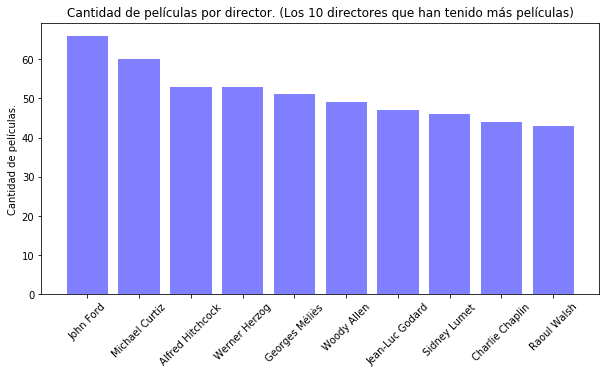

In [90]:
plt.subplots(figsize=(10,5))
objects = list(distribucion_directores[:10].index)
y_pos = np.arange(len(objects))
performance = list(distribucion_directores[:10].values)

plt.bar(y_pos, performance, align='center', alpha=0.5,color="b")
plt.xticks(y_pos, objects, rotation=45)
plt.ylabel('Cantidad de películas.')
plt.title('Cantidad de películas por director. (Los 10 directores que han tenido más películas)')

plt.show()

In [91]:
# Veamos qué directores han ganado más entre todas las películas que han producido.
directoresConMasGanancia=df_movies_metadata13.groupby("director").revenue.sum().sort_values(ascending=False)
directoresConMasGanancia[:10]

director
Steven Spielberg     9.256621e+09
Peter Jackson        6.528245e+09
Michael Bay          6.437467e+09
James Cameron        5.900610e+09
David Yates          5.334563e+09
Christopher Nolan    4.747409e+09
Robert Zemeckis      4.138234e+09
Tim Burton           4.032916e+09
Ridley Scott         3.917529e+09
Chris Columbus       3.866837e+09
Name: revenue, dtype: float64

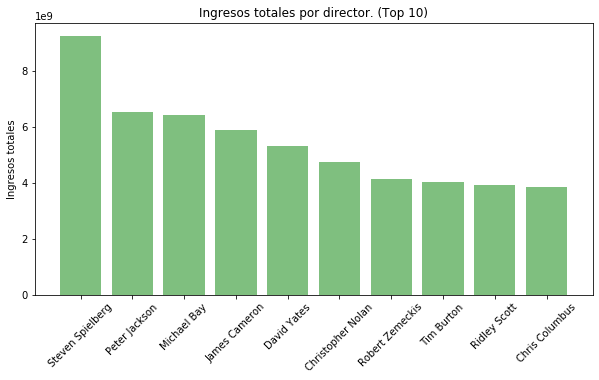

In [92]:
plt.subplots(figsize=(10,5))
objects = list(directoresConMasGanancia[:10].index)
y_pos = np.arange(len(objects))
performance = list(directoresConMasGanancia[:10].values)

plt.bar(y_pos, performance, align='center', alpha=0.5,color="g")
plt.xticks(y_pos, objects, rotation=45)
plt.ylabel('Ingresos totales')
plt.title('Ingresos totales por director. (Top 10)')

plt.show()

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Correlación entre variables</font>

In [93]:
#ESTUDIO DEL LA RELACIÓN ENTRE LAS CARACTERÍSTICAS:
df_movies_metadata13.head(3)#De esta vamos a extraer solo las características que en realidad sumen. Por ejemplo el home page no sumaría conocimiento a mi
#análisis ya que hay muchos valores nan y de los que existen todos son distintos. EL Overview tabién es solo de qué trata la película a lo mucho se podría 
#hacer un anális de las palabras usadas o más frecuentes entre las películas, pero se prefiere hacerlo para otra oportunidad. poster_path También por ser 
# solo un link. Tagline tambén no será tomadado con la misma lógica. Adulta también se retirará ya que casi todas son de adulto. 

,adult,budget,homepage,original_language,original_title,overview,popularity,poster_path,release_date,revenue,...,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto,movieId,tmdbId,rating,elenco,director
imdbId,,,,,,,,,,,,,,,,,,,,,
114709,True,30000000.0,http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,...,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection,1,862.0,3.888157,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
113497,True,65000000.0,NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,...,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",[United States of America],"[English, Français]",None,2,8844.0,3.236953,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
113228,True,0.0,NaN,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0.0,...,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]",[United States of America],[English],Grumpy Old Men Collection,3,15602.0,3.175550,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch


In [94]:
df_movie_without_some_features=df_movies_metadata13.drop(["adult","homepage","overview","poster_path","tagline"],axis=1)
df_movie_without_some_features

,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,...,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto,movieId,tmdbId,rating,elenco,director
imdbId,,,,,,,,,,,,,,,,,,,,,
114709,30000000.0,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,False,...,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection,1,862.0,3.888157,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
113497,65000000.0,en,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,False,...,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",[United States of America],"[English, Français]",None,2,8844.0,3.236953,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
113228,0.0,en,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,False,...,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]",[United States of America],[English],Grumpy Old Men Collection,3,15602.0,3.175550,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch
114885,16000000.0,en,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,False,...,[Twentieth Century Fox Film Corporation],"[Comedy, Drama, Romance]",[United States of America],[English],None,4,31357.0,2.875713,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker
113041,0.0,en,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,False,...,"[Sandollar Productions, Touchstone Pictures]",[Comedy],[United States of America],[English],Father of the Bride Collection,5,11862.0,3.079565,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102797,0.0,en,Robin Hood,5.683753,1991-05-13,0.0,104.0,Released,Robin Hood,False,...,[Odessa Film Studios],[Adventure],"[Ukraine, Russia]",[Pусский],None,176267,30840.0,4.000000,"[Patrick Bergin, Uma Thurman, David Morrissey]",John Irvin
6209470,0.0,fa,رگ خواب,0.072051,NaT,0.0,90.0,Released,Subdue,False,...,[Mosfilm],"[Fantasy, Comedy, Romance, Drama]",[Russia],[Pусский],None,176269,439050.0,3.500000,"[Leila Hatami, Kourosh Tahami, Elham Korda]",Hamid Nematollah
2028550,0.0,tl,Siglo ng Pagluluwal,0.178241,2011-11-17,0.0,360.0,Released,Century of Birthing,False,...,[],"[Comedy, Horror]",[United States of America],[English],None,176271,111109.0,5.000000,"[Angel Aquino, Perry Dizon, Hazel Orencio]",Lav Diaz


In [95]:
#Para la correlación entre mis características se usará la de la correlación de Pearson. 
df_movie_without_some_features.corr(method='pearson')

,budget,popularity,revenue,runtime,video,vote_average,vote_count,movieId,tmdbId,rating
budget,1.000000,0.448869,0.768753,0.134414,-0.010963,0.071548,0.676476,-0.155419,-0.100389,0.029193
popularity,0.448869,1.000000,0.505901,0.128612,-0.015819,0.151355,0.559545,-0.203700,-0.080347,0.082302
revenue,0.768753,0.505901,1.000000,0.103847,-0.007988,0.083513,0.811928,-0.114400,-0.070349,0.058693
runtime,0.134414,0.128612,0.103847,1.000000,-0.011048,0.157159,0.113273,-0.172809,-0.118447,0.112976
video,-0.010963,-0.015819,-0.007988,-0.011048,1.000000,-0.022412,-0.009507,0.035326,0.041522,-0.001580
vote_average,0.071548,0.151355,0.083513,0.157159,-0.022412,1.000000,0.123697,-0.173634,-0.162695,0.325009
vote_count,0.676476,0.559545,0.811928,0.113273,-0.009507,0.123697,1.000000,-0.117076,-0.063556,0.105608
movieId,-0.155419,-0.203700,-0.114400,-0.172809,0.035326,-0.173634,-0.117076,1.000000,0.556238,-0.111933
tmdbId,-0.100389,-0.080347,-0.070349,-0.118447,0.041522,-0.162695,-0.063556,0.556238,1.000000,-0.052032
rating,0.029193,0.082302,0.058693,0.112976,-0.001580,0.325009,0.105608,-0.111933,-0.052032,1.000000


In [96]:
(df_movie_without_some_features.corr(method='pearson')>0.70) & (df_movie_without_some_features.corr(method='pearson')!=1)
#Si nos preguntalos cuáles son las características que al menor tienen una correlación de al menos unos .7:
#Son revenue con budget, lo cual tienen algo de lógica ya que a medida que más presumuesto tienen puedes tener una mejor película, por ende puede tener
#unos mejores ingresos.
#Otra correlación con este umbral de 0.7 aceptable es revenue con vote_count, lo cual nos dice que sí importa la cotación que se han hecho
#para las películas en la página IMDB.

,budget,popularity,revenue,runtime,video,vote_average,vote_count,movieId,tmdbId,rating
budget,False,False,True,False,False,False,False,False,False,False
popularity,False,False,False,False,False,False,False,False,False,False
revenue,True,False,False,False,False,False,True,False,False,False
runtime,False,False,False,False,False,False,False,False,False,False
video,False,False,False,False,False,False,False,False,False,False
vote_average,False,False,False,False,False,False,False,False,False,False
vote_count,False,False,True,False,False,False,False,False,False,False
movieId,False,False,False,False,False,False,False,False,False,False
tmdbId,False,False,False,False,False,False,False,False,False,False
rating,False,False,False,False,False,False,False,False,False,False


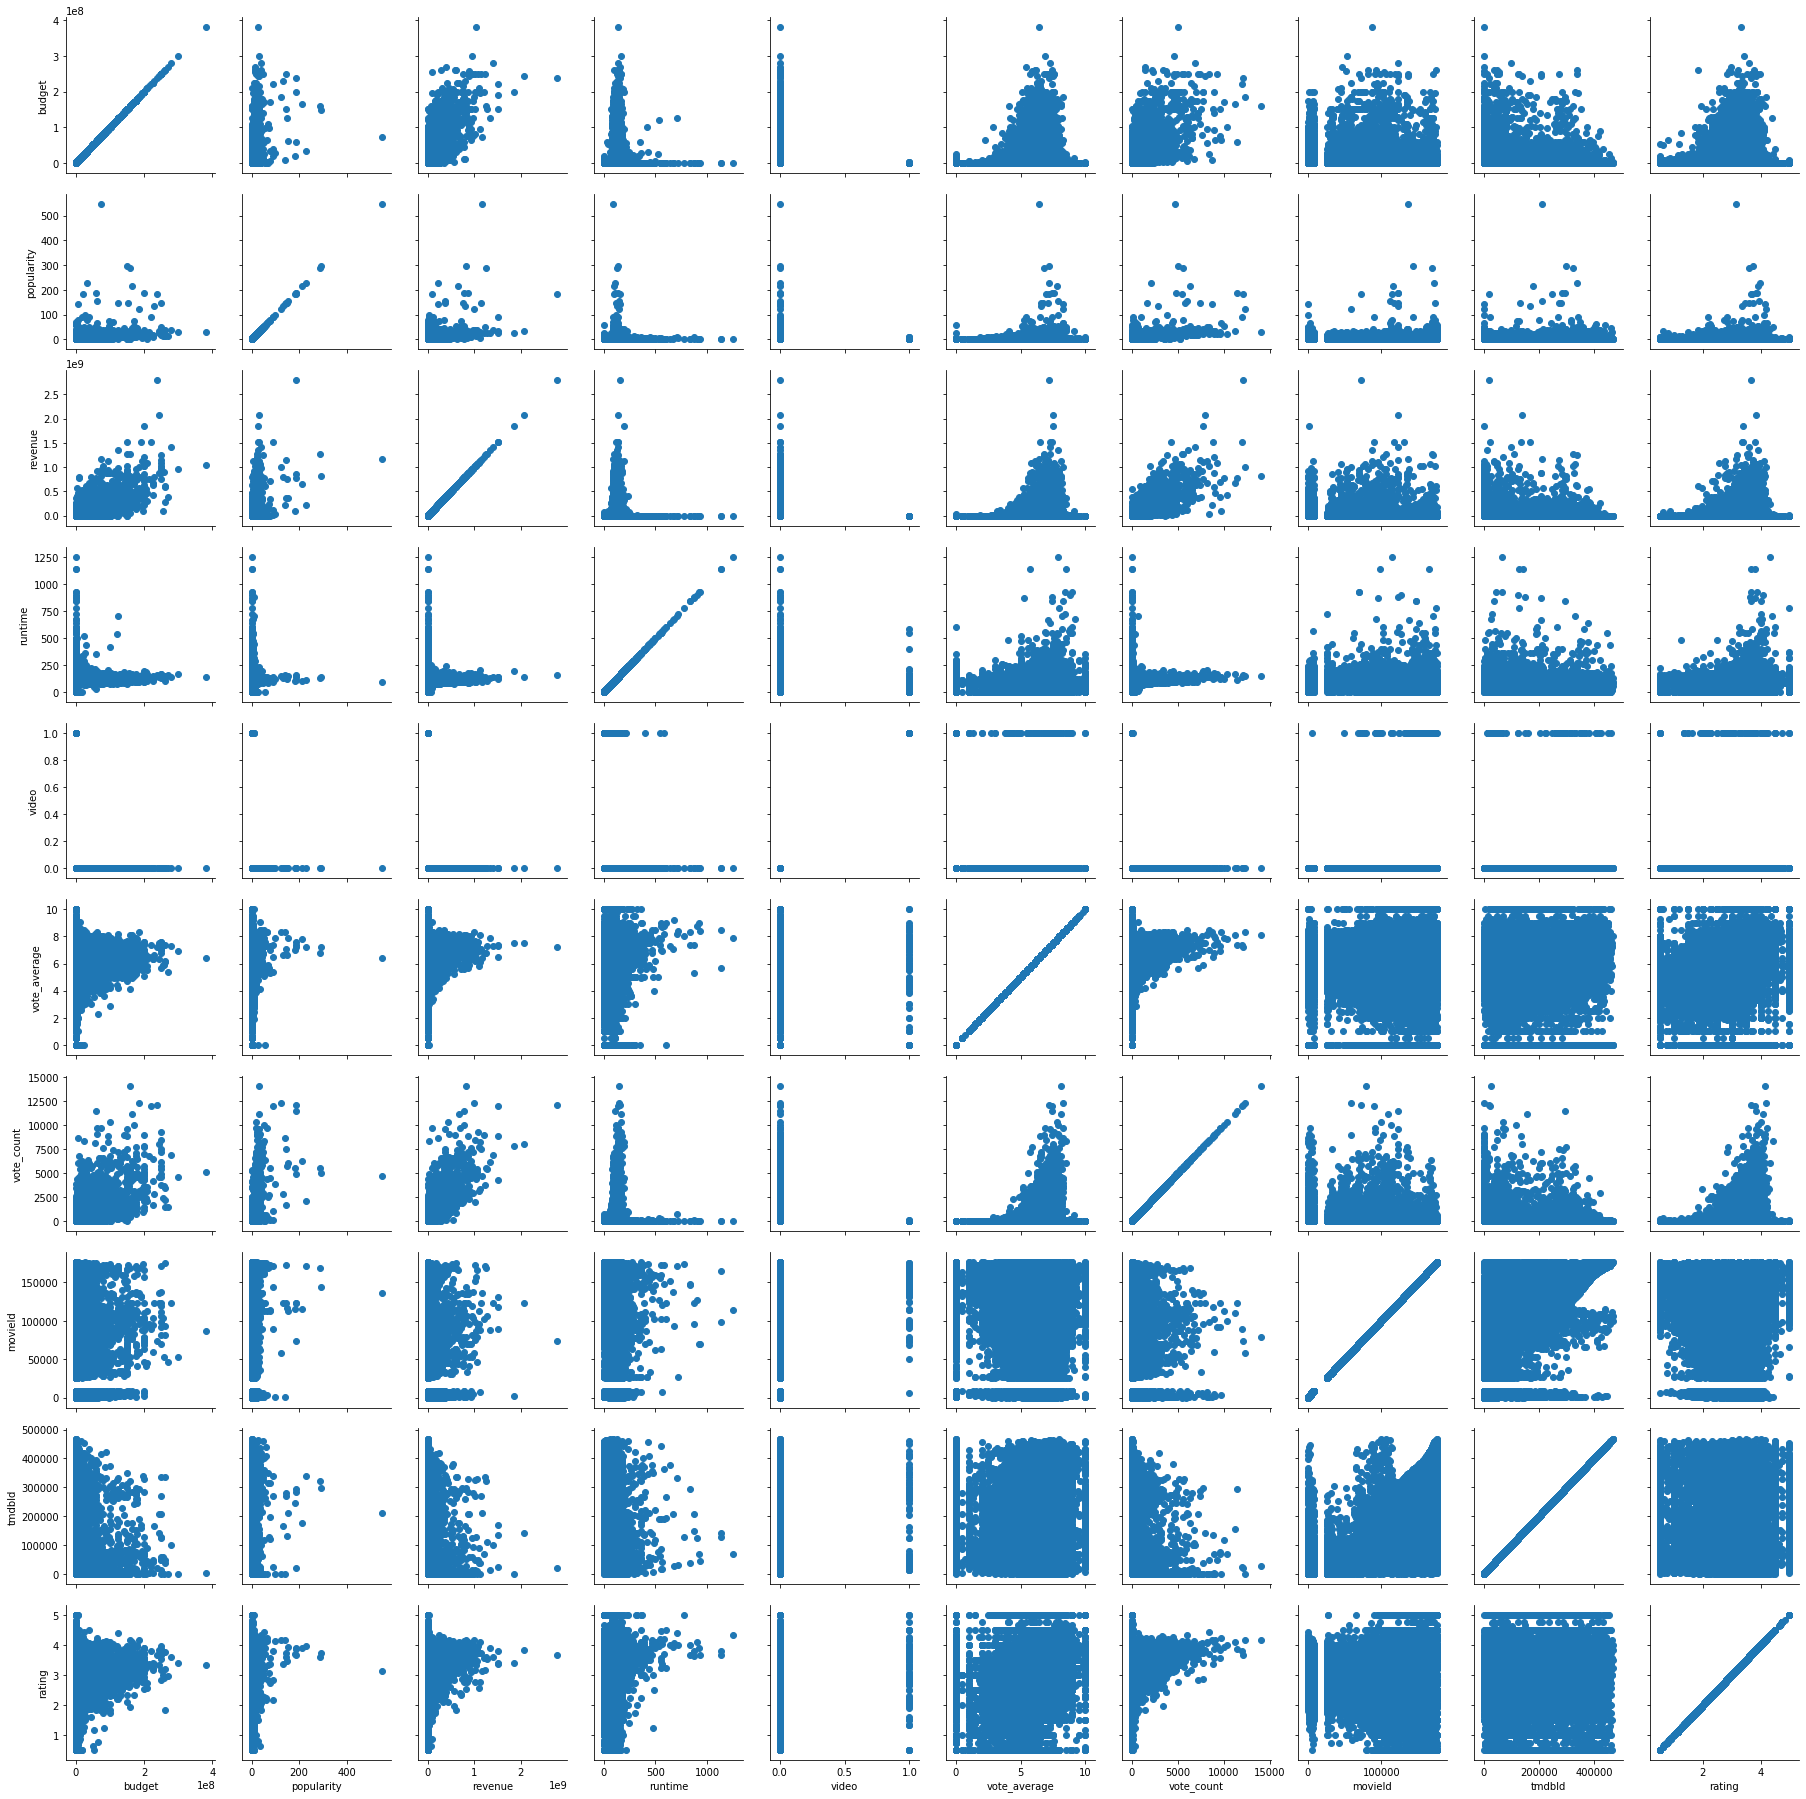

In [97]:
g = sns.PairGrid(df_movie_without_some_features)#Se demora en compilar
g = g.map(pl.scatter)
pl.show()#Podemos evidenciar lo antes dicho pero en modo gráfico.


---
<a id="section"></a>
# <font color="#004D7F"> 5. Contraste de hipótesis </font>


<a id="section54"></a>
## <font color="#004D7F"> 5.4. Test de significacia no paramétrico</font>

In [98]:
#RELACIONES
df_movie_without_some_features.groupby("original_language").size().sort_values(ascending=False)[:10]#Frecuencia por idioma.
#por se una variable categorina, y no es ordenada no se puede llegar a una gauseana, por ende se le tiene que aplicar test no-parametricos

original_language
en    31557
fr     2406
it     1512
ja     1330
de     1073
es      986
ru      825
hi      504
ko      442
zh      407
dtype: int64

In [99]:
data1=df_movie_without_some_features.revenue[df_movie_without_some_features.original_language=="en"]#los que languague es english
data2=df_movie_without_some_features.revenue[df_movie_without_some_features.original_language=="fr"]#los que languague es french
print(len(data1),len(data2))#Deben de tener la misma longitud. De data1 vamos a tomar unas cuantas líneas. 

31557 2406


In [100]:
data1corregido=random.sample(list(data1),len(data2))#Tenemos que igualar la cantidad de elementos
s,p=scp.stats.wilcoxon(data1corregido,data2)
print("p valor: ",p)
alpha=0.05
if p<=alpha:
    print("Hay una diferencia en el revenueve para las categorías las cuales están en lengua Inglés y Francés")
else:
    print("El revenue es independiente de la lengua, o sea no hay diferencias significativas para el revenuede de lengua inglesa y revenue de lengua francesa.")

p valor:  1.9903567074470082e-54
Hay una diferencia en el revenueve para las categorías las cuales están en lengua Inglés y Francés


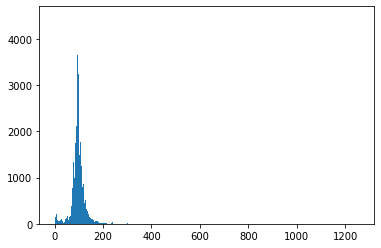

In [101]:
#Notamos que el tiempo de la película es una especie de una gauseana. Veamos si lo es.
plt.figsize=(20,10)
plt.hist(df_movie_without_some_features.runtime,bins=500)
plt.show()

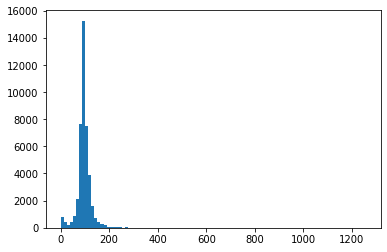

In [102]:
df_movie_without_some_features.runtime.sort_values()#imposible que hayan peliculas con timpo igual a 0 min. Esto se puede deber a que 
#cuando se extrajo la data el no estaba disponible dicha informacion. Por ejemplo para revenue (ingreso) puede ser cero y puede deberse
#a que todavía no se ha tomado información de la ganancia de esa película (puede que recién se haya estrenado)
df_movie_without_some_features.groupby("runtime").size()#Se tienen 1511 películas las cuales tienen 0 en su tiempo de duración
#No tomemos en cuenta a los que tienen duracion 0 min y ver que sucede:
timpoDistintoDeCero=df_movie_without_some_features[df_movie_without_some_features.runtime>0].runtime#Contienen los que tienen duracion !=0
#timpoDistintoDeCero=df_movie_without_some_features[(df_movie_without_some_features.runtime>40) & (df_movie_without_some_features.runtime<200)].runtime
plt.hist(timpoDistintoDeCero.dropna(),bins=100)
plt.show()

In [103]:
scp.stats.shapiro(timpoDistintoDeCero)#Como p=0.0 Entonces no es una gauseana

(0.6634975671768188, 0.0)

In [104]:
len(timpoDistintoDeCero)

42871

In [105]:
timpoDistintoDeCero.values.shape=(len(timpoDistintoDeCero),1)
timpoDistintoDeCero.values.shape


(42871, 1)

In [106]:
from sklearn.preprocessing import StandardScaler
# array = data.values
# # separate array into input and output components
# X = array[:,0:4]
# Y = array[:,4]
X=timpoDistintoDeCero.values
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.48 ]
 [ 0.183]
 [ 0.096]
 [ 0.845]
 [ 0.24 ]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3EB8EC748>]],
      dtype=object)

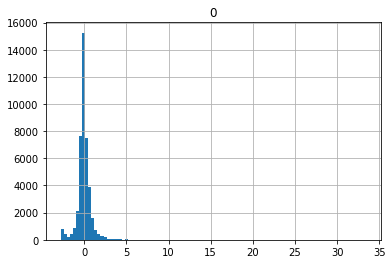

In [107]:
df_rescaledX=pd.DataFrame(rescaledX)
df_rescaledX.hist(bins=100)

In [108]:
scp.stats.shapiro(df_rescaledX)#así se le realice un standarizacion igual no se forma una gauseana

(0.663513720035553, 0.0)


---
<a id="section6"></a>
# <font color="#004D7F"> 6. Análisis exploratorio de los datos </font>

Finalmente, y una vez ya que conocemos nuestros datos en profundidad vamos a representar ciertas estadísticas finales de variables que al analizarlas conjuntamente nos da información relevante. Para ello, hay que tener en mente el módulo 3.3. Análisis exploratorio de datos.

Este trabajo se dejará abierto ya que sois vosotros los que escogen el conjunto de datos y el cual deberéis extraer información relevante y representarla con Seaborn.


In [109]:
#USO DE SEABORN: mejores gráficas.
df_movies_metadata13.head(2)

,adult,budget,homepage,original_language,original_title,overview,popularity,poster_path,release_date,revenue,...,production_companies_abierto,generos_desenvuelto,paises_de_produccion_desenvuelto,lenguas_habladas_desenvuelto,coleccion_desenvuelto,movieId,tmdbId,rating,elenco,director
imdbId,,,,,,,,,,,,,,,,,,,,,
114709,True,30000000.0,http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,...,[Pixar Animation Studios],"[Animation, Comedy, Family]",[United States of America],[English],Toy Story Collection,1,862.0,3.888157,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
113497,True,65000000.0,NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,...,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",[United States of America],"[English, Français]",None,2,8844.0,3.236953,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston


In [110]:
#Ordenamiento de la duración media de la película de acuerdo al idioma original (original_language)
freqLanguage=df_movies_metadata13.groupby("original_language").size().sort_values(ascending=False)[:10]
freqLanguage

original_language
en    31557
fr     2406
it     1512
ja     1330
de     1073
es      986
ru      825
hi      504
ko      442
zh      407
dtype: int64

In [111]:
freqLanguage.sum()#Cantida total

41042

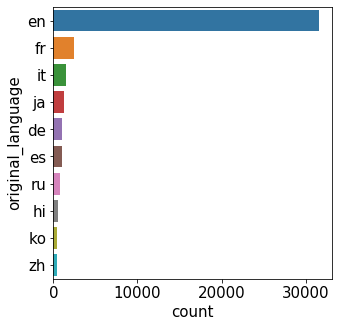

In [112]:
plt.rcParams.update({'font.size':15})
plt.subplots(figsize=(5,5))
sns.countplot(y='original_language', data=df_movies_metadata13, order=freqLanguage.index)
plt.show()

In [113]:
#Veamos el cremiento de cantidad de películas por año
df_movies_metadata13.iloc[0].release_date.year
years=[None]*len(df_movies_metadata13)
for i in range(len(df_movies_metadata13)):
    years[i]=df_movies_metadata13.iloc[i].release_date.year

In [114]:
df_movies_metadata13["years"]=years#it has years now
numPeliculasPorAnio=df_movies_metadata13.groupby("years").size().sort_index(ascending=False)
numPeliculasPorAnio.head(10)
#numPeliculasPorAnio.hist()
#Solo tomemos en cuenta las películas hasta e 2016 ya que este df fue extraido el 2017. los anos 2018-2020 quiere decir que la película
#aún no se estrenava hasta la fecha de extraccion de los datos

years
2020.0       1
2018.0       5
2017.0     527
2016.0    1569
2015.0    1855
2014.0    1952
2013.0    1871
2012.0    1705
2011.0    1651
2010.0    1492
dtype: int64

In [115]:
serie=numPeliculasPorAnio.tail(len(numPeliculasPorAnio)-3)#del 2016 hacia atras
df=pd.DataFrame(serie)
df.index=df.index.astype("int")
df2=df.head(25)
df.head()


,0
years,
2016,1569
2015,1855
2014,1952
2013,1871
2012,1705


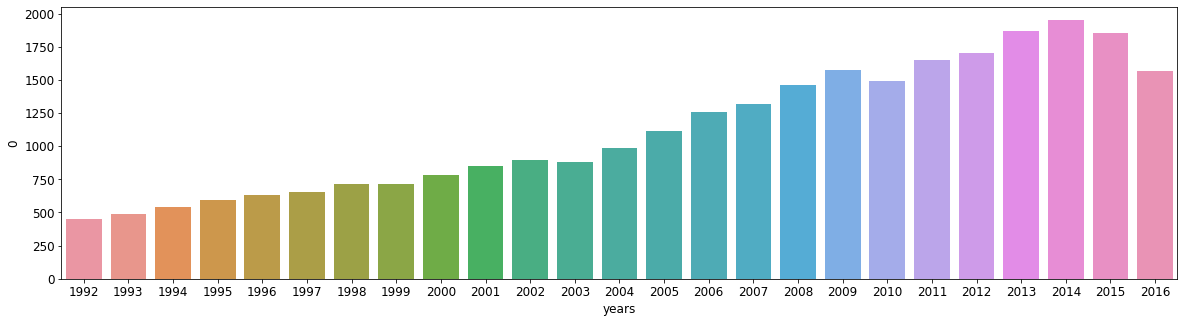

In [116]:
# Hacemos un barplot
plt.rcParams.update({'font.size':12})
plt.subplots(figsize=(20,5))
sns.barplot(df2.index, df2[0])#Notamos que por años la cantidad de pelciuals que se producen van creciendo.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

In [117]:
df_movies_metadata13.to_csv(r"df_movie_limpio.csv")


---
<a id="section7"></a>
# <font color="#004D7F"> 7. Conclusiones </font>


En esta última sección se deberán poner las conclusiones a las que llegue al haber trabajado con el conjunto de datos. Es decir, realizar un resumen de la discusión de contenidos realizado a lo largo de todo el documento

In [118]:
#Ya se mostro en todo el df
#Entre las más resaltantes es que las cantidad de las películas que se producen por año van creciendo con el pasar de los años.
#Que la gran cantidad de las películas que se producen están en en idioma original de inglés. Son un 76.8% del total de las observaciones.
#Que entre las características que más resalta para saber cuantos será los ingresos (revenue) son la variable budget (presupuesto) y 
#la cantidad de vote_average que está dado en la página de IMDB.



<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>